# 探索的データ分析（EDA）を実行

## ライブラリをインポート

In [13]:
import warnings
warnings.filterwarnings("ignore")

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from adjustText import adjust_text
from pandas import json_normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from tqdm.notebook import tqdm

## グラフ表示の際のフォント種類やフォントサイズを設定

In [14]:
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["font.family"] = "IPAexGothic"

## ファイルのコンフィグ情報を定義

In [15]:
class CFG:
    input_dir = "../input"
    output_dir = "../output"
    random_seed = 42
    exp_no = "eda"

## データを読み込み、データフレームに格納

In [16]:
train_df = pd.read_csv(f"{CFG.input_dir}/chapter3_demo_data_postprocess.csv")
train_df

,サンプルID,サンプル作製日,担当者,備考,材料１,材料２,材料３,材料４,材料５,材料６,...,乾燥温度,乾燥時間,擦過回数,擦過圧力,耐擦過性,画像濃度,粘度,表面張力,保存後粘度,保存後状態
0,DP_001,2024/1/19,高岡,NaN,46.9,40,0,2,0,2.0,...,25,NaN,10,5,2.4,1.06,9.0,35,NaN,NaN
1,DP_002,2024/1/19,高岡,NaN,47.4,40,0,2,0,1.5,...,25,NaN,10,5,2.4,1.07,9.0,38,NaN,NaN
2,DP_003,2024/1/19,高岡,NaN,47.7,40,0,2,0,1.2,...,25,NaN,10,5,2.4,1.07,9.0,40,NaN,NaN
3,DP_004,2024/1/19,高岡,NaN,47.9,40,0,2,0,1.0,...,25,NaN,10,5,2.4,1.08,9.0,41,NaN,NaN
4,DP_005,2024/1/19,高岡,NaN,48.4,40,0,2,0,0.5,...,25,NaN,10,5,2.4,1.09,9.0,44,NaN,NaN
5,DP_006,2024/1/30,福原,ref,47.4,40,0,2,0,1.5,...,25,NaN,10,5,2.7,1.07,9.1,38,NaN,NaN
6,DP_007,2024/1/30,福原,NaN,47.4,40,0,2,0,0.0,...,25,NaN,10,5,2.7,1.05,9.1,37,NaN,NaN
7,DP_008,2024/1/30,福原,NaN,47.4,40,0,2,0,0.0,...,25,NaN,10,5,2.7,1.02,9.1,39,NaN,NaN
8,DP_009,2024/1/30,福原,NaN,45.4,40,0,2,0,1.5,...,25,NaN,10,5,3.1,1.07,10.3,36,NaN,NaN
9,DP_010,2024/1/30,福原,NaN,43.4,40,0,2,0,1.5,...,25,NaN,10,5,3.6,1.07,11.5,34,NaN,NaN


## データの列名を確認

In [17]:
# train_dfの列名をリストで取得
columns = train_df.columns
# train_dfの列名を表示
columns

Index(['サンプルID', 'サンプル作製日', '担当者', '備考', '材料１', '材料２', '材料３', '材料４', '材料５',
       '材料６', '材料７', '材料８', '材料９', '材料１０', '材料１１', '材料１２', '材料１３', '塗布量',
       '乾燥方式', '乾燥温度', '乾燥時間', '擦過回数', '擦過圧力', '耐擦過性', '画像濃度', '粘度', '表面張力',
       '保存後粘度', '保存後状態'],
      dtype='object')

## データの欠損を確認

In [18]:
# 欠損のある列を表示
train_df.isnull().sum()

サンプルID      0
サンプル作製日     0
担当者         0
備考         30
材料１         0
材料２         0
材料３         0
材料４         0
材料５         0
材料６         0
材料７         0
材料８         0
材料９         0
材料１０        0
材料１１        0
材料１２        0
材料１３        0
塗布量         0
乾燥方式        0
乾燥温度        0
乾燥時間       14
擦過回数        0
擦過圧力        0
耐擦過性        0
画像濃度        0
粘度          0
表面張力        0
保存後粘度      26
保存後状態      26
dtype: int64

## 使用する説明変数をリストとして定義

In [19]:
numeric_parameter_cols = [
    # 'サンプルID',
    # 'サンプル名',
    # 'サンプル作成日',
    # '担当者',
    # '備考',
    "材料１",
    "材料２",
    "材料３",
    "材料４",
    "材料５",
    "材料６",
    "材料７",
    "材料８",
    "材料９",
    "材料１０",
    "材料１１",
    "材料１２",
    "材料１３",
    "塗布量",
    "乾燥方式",
    "乾燥温度",
    # '乾燥時間',
    "擦過回数",
    "擦過圧力",
    # '耐擦過性','画像濃度', '粘度', '表面張力', '保存後粘度'
]

## 目的変数をリストとして定義

In [20]:
objective_cols = ["耐擦過性", "画像濃度", "粘度", "表面張力", "保存後粘度"]

## 目的変数ごとにヒストグラムを作成し、分布を確認

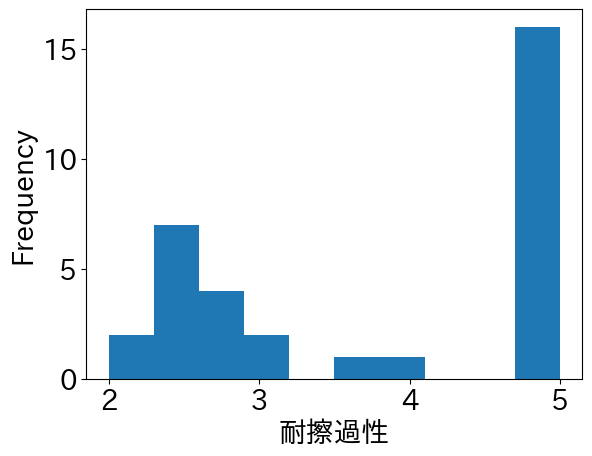

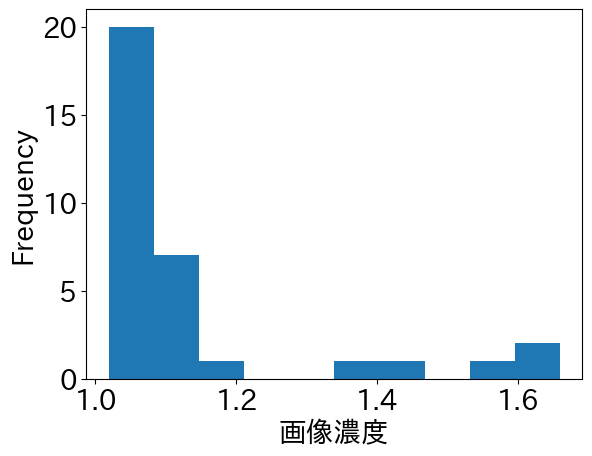

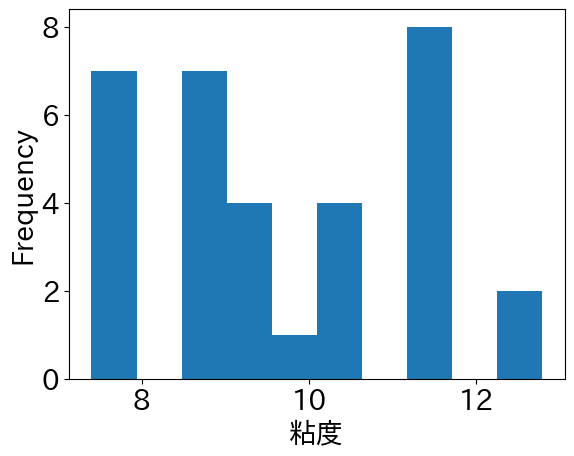

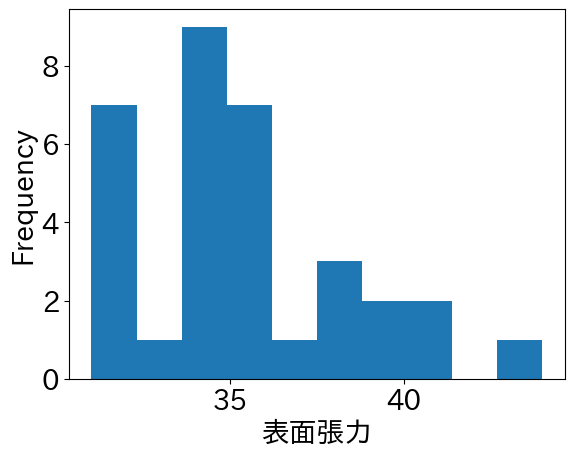

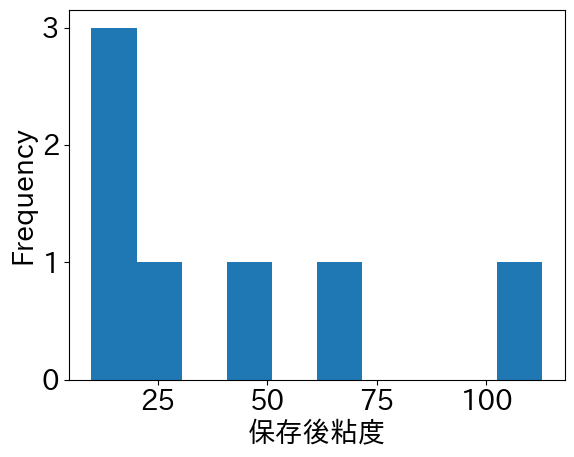

In [21]:
for col in objective_cols:
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 説明変数ごとにヒストグラムを作成し、分布を確認

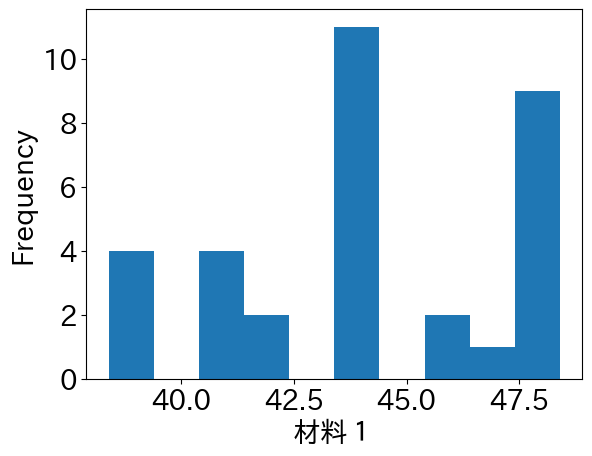

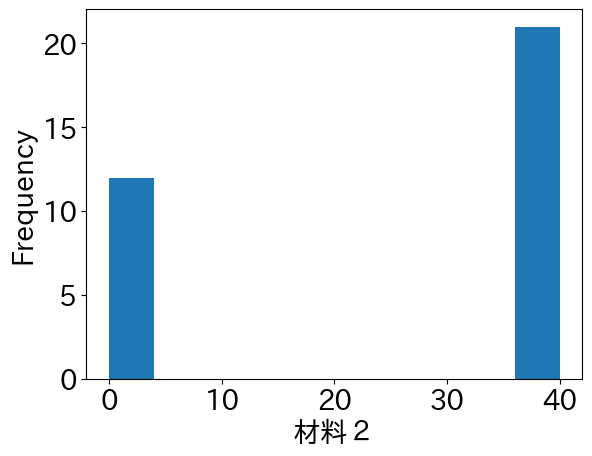

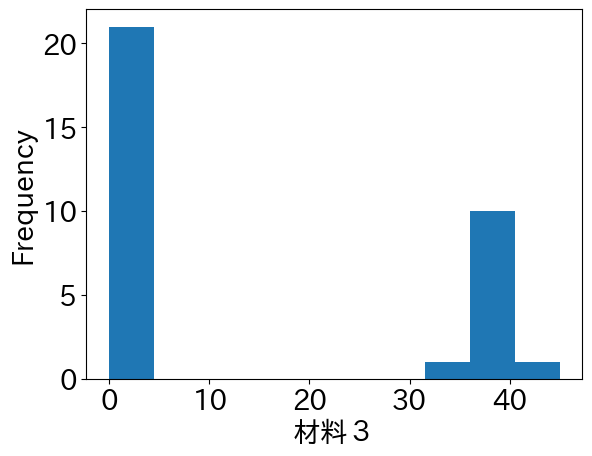

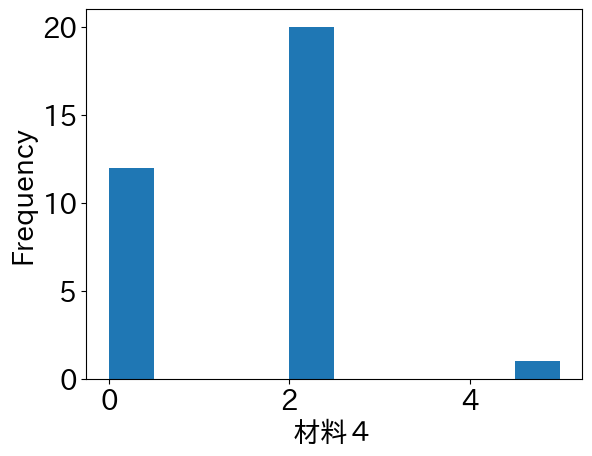

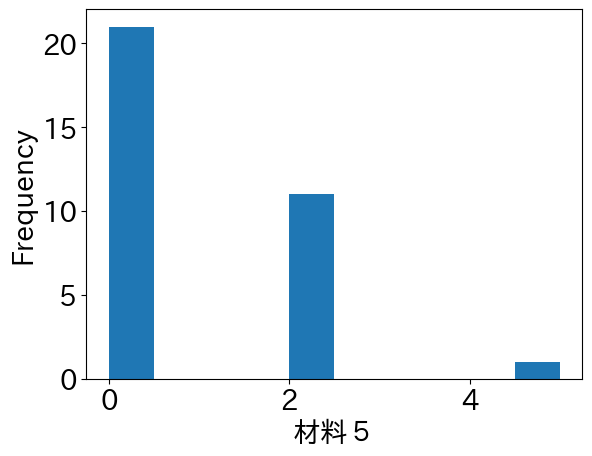

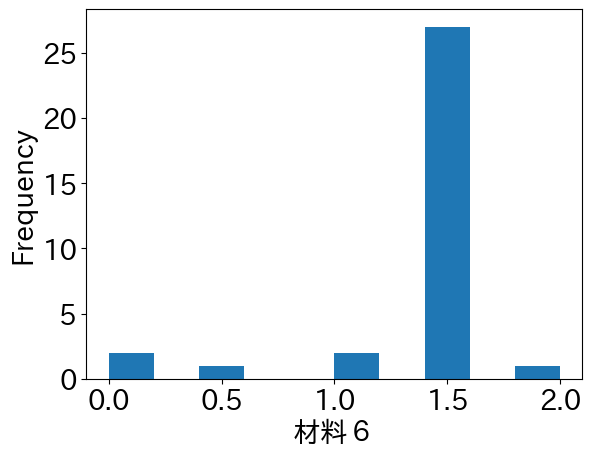

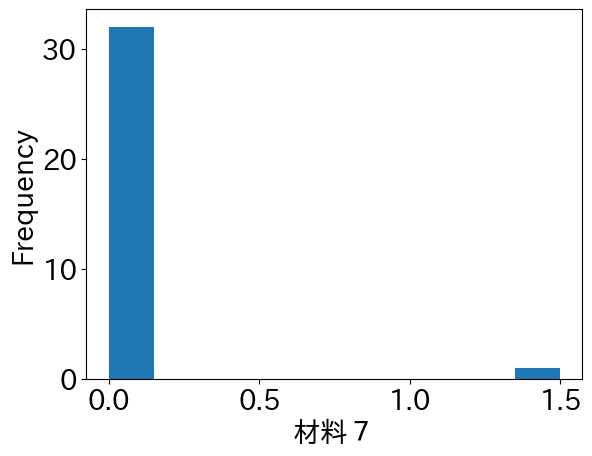

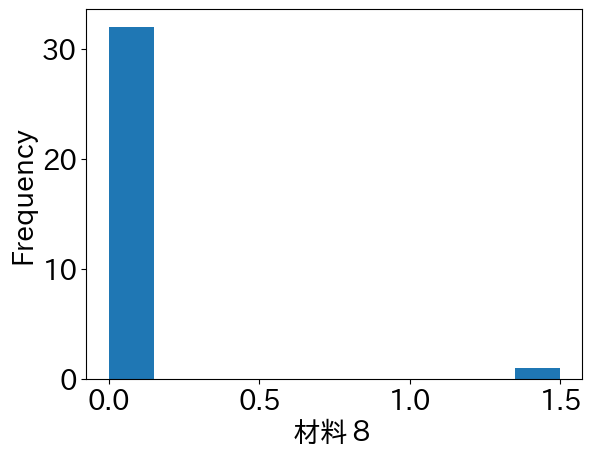

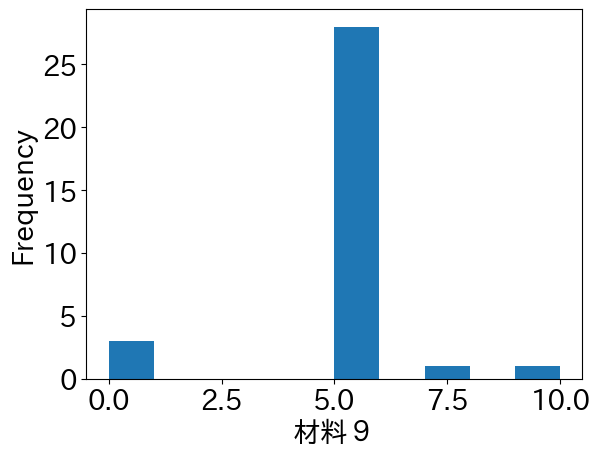

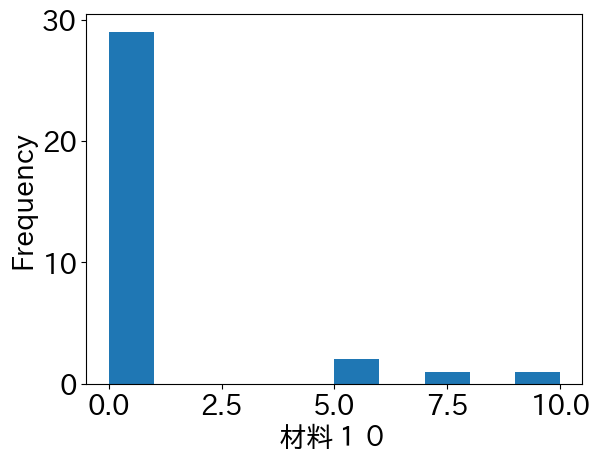

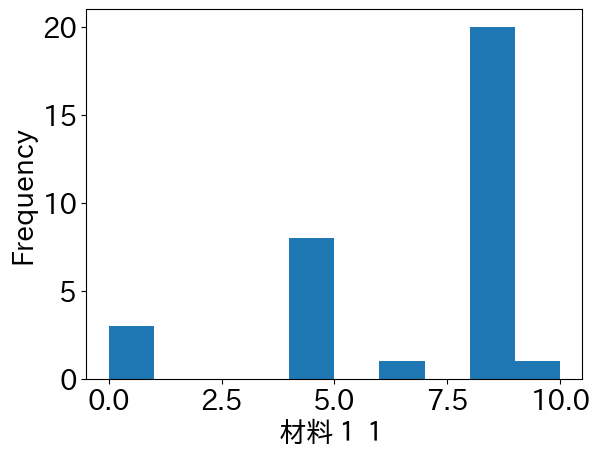

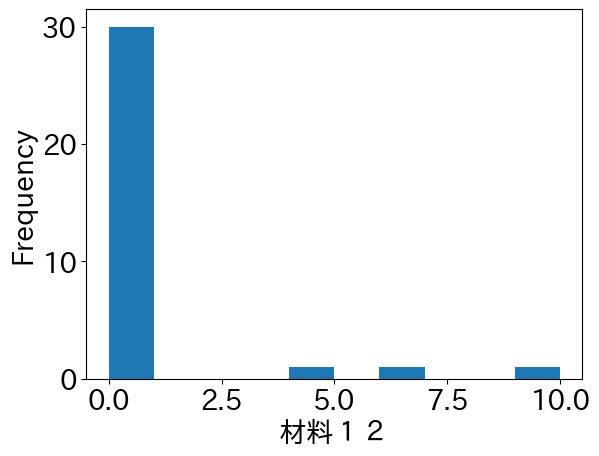

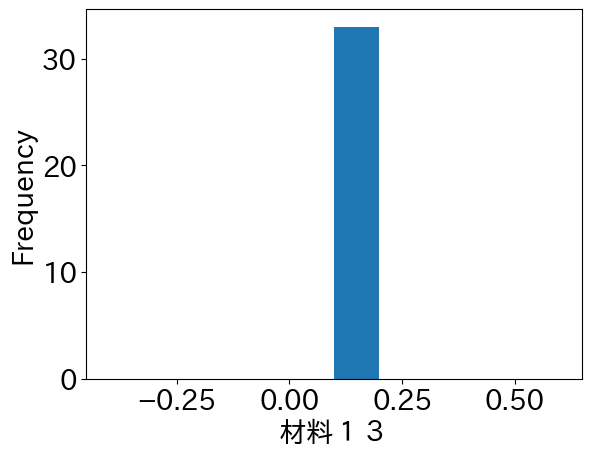

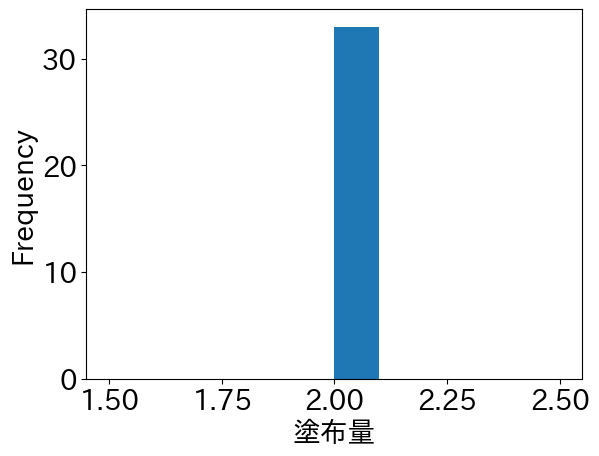

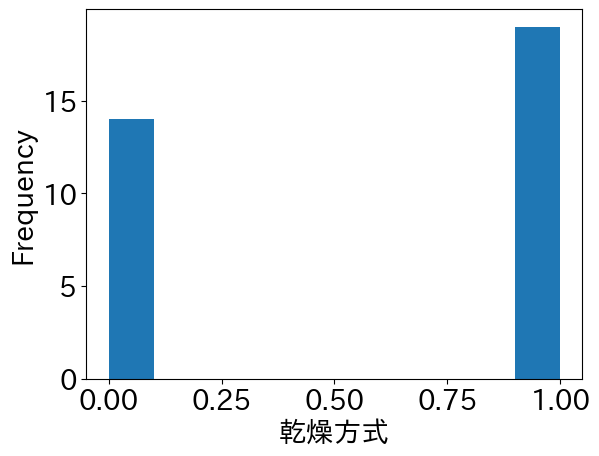

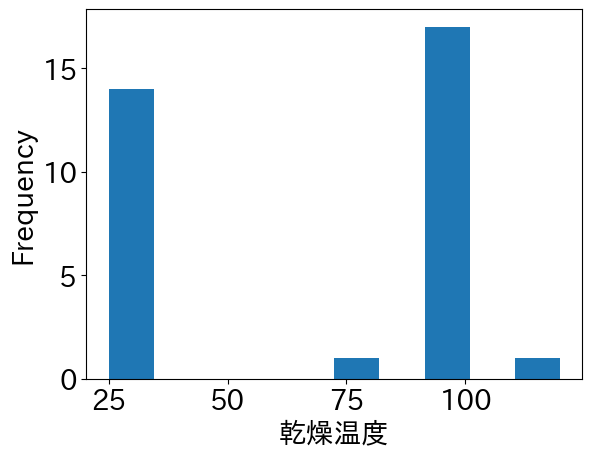

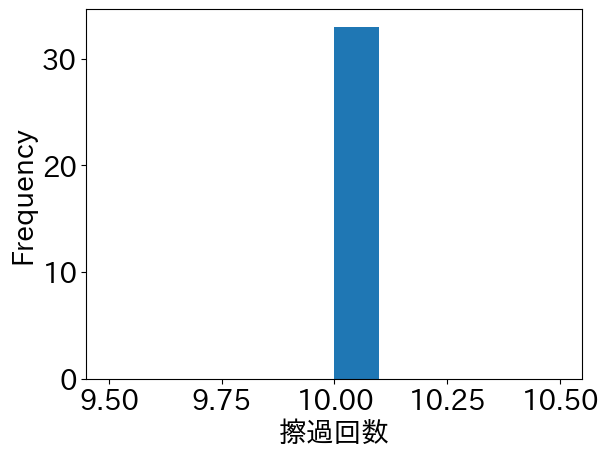

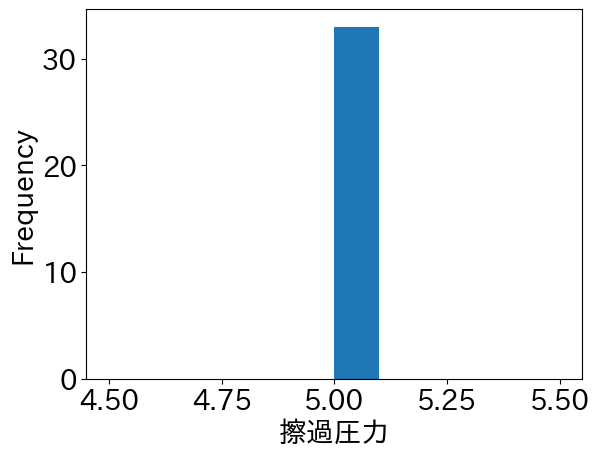

In [22]:
# numeric_parameter_colsそれぞれのhistgramをplt.histで描画、x軸のラベルは列名、y軸のラベルは頻度
for col in numeric_parameter_cols:
    plt.hist(train_df[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## 説明変数のスケーリング

In [23]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(train_df[numeric_parameter_cols])
X_train

array([[ 1.00830673,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         1.53976945, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.16797142,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
         0.31831772, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.26377024,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.41455331, -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.        , -1.16496475,
        -1.15482139,  0.        ,  0.        ],
       [ 1.32763612,  0.75592895, -0.75438695,  0.55339859, -0.68624357,
        -0.903134  , -0.1767767 , -0.1767767 ,  0.12768848, -0.35355339,
        -0.86677605, -0.2943724 ,  0.        ,  0.   

## PCAで説明変数を2次元に圧縮し可視化

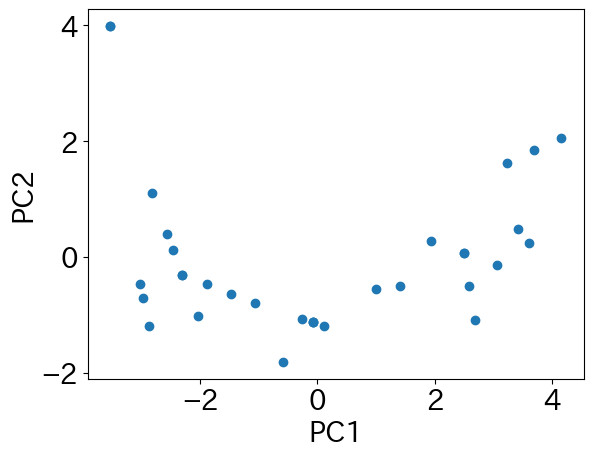

In [24]:
# PCAを実行、n_components=2、random_state=CFG.random_seed
pca = PCA(n_components=2, random_state=CFG.random_seed)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

# X_train_pcaをDataFrameに変換
train_pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])

# train_pca_dfの散布図を描画
plt.scatter(train_pca_df["PC1"], train_pca_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

## PCAで説明変数を2次元に圧縮し可視化&各水準のIDを表示

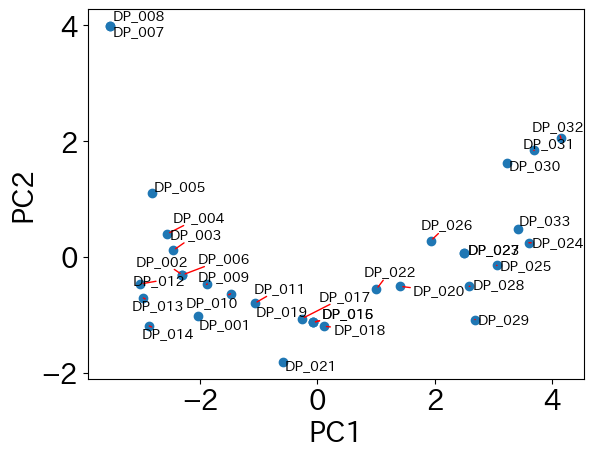

In [25]:
# PCAを実行、n_components=2、random_state=CFG.random_seed
pca = PCA(n_components=2, random_state=CFG.random_seed)
X_train_pca = pca.fit_transform(X_train)
X_train_pca

# X_train_pcaをDataFrameに変換
train_pca_df = pd.DataFrame(X_train_pca, columns=["PC1", "PC2"])

# train_pca_dfの散布図を描画
plt.scatter(train_pca_df["PC1"], train_pca_df["PC2"])
plt.xlabel("PC1")
plt.ylabel("PC2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_pca_df["PC1"][i],
        train_pca_df["PC2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_pca_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=5）

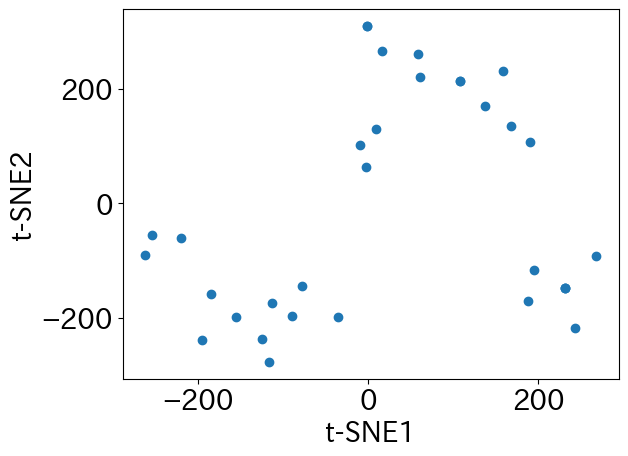

In [26]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=5
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=5）&各水準のIDを表示

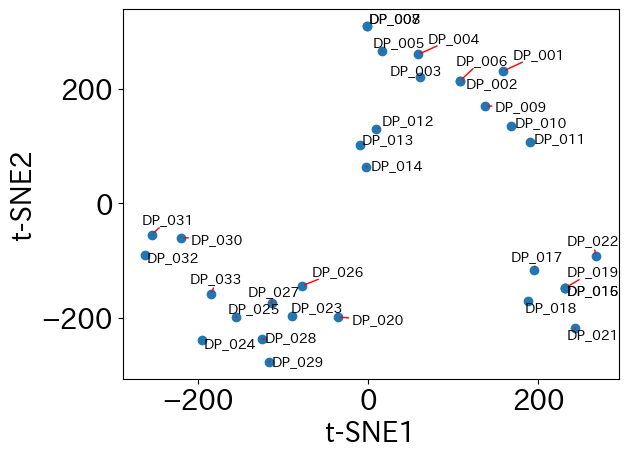

In [27]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=5
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_tsne_df["t-SNE1"][i],
        train_tsne_df["t-SNE2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_tsne_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=10）

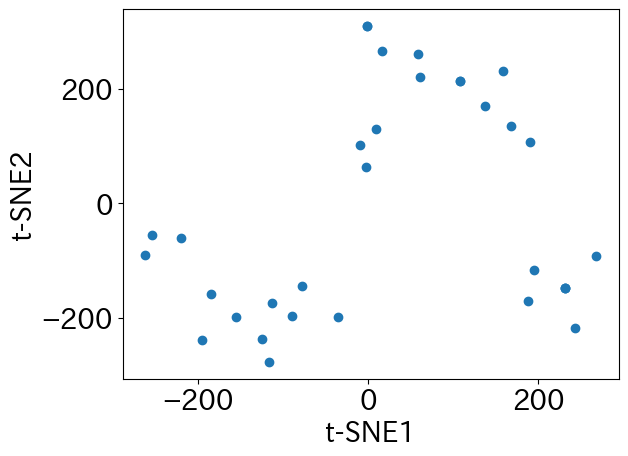

In [28]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=10
)  # perplexity must be less than n_samples、デフォルト値は30であるため、デフォルトだと今回はエラーになる
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=10）&各水準のIDを表示

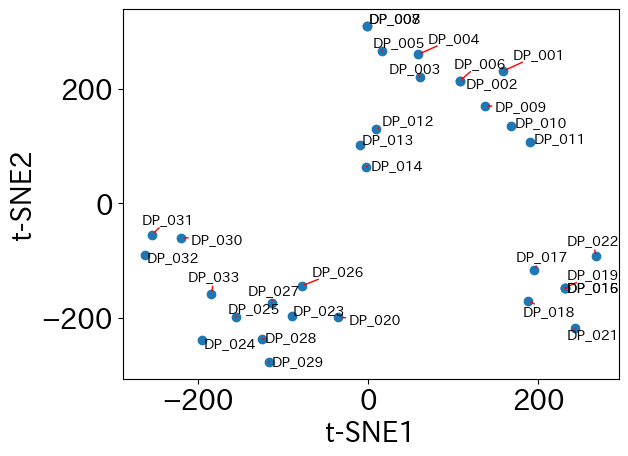

In [29]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=10
)  # perplexity must be less than n_samples、デフォルト値は30であるため、デフォルトだと今回はエラーになる
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_tsne_df["t-SNE1"][i],
        train_tsne_df["t-SNE2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_tsne_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=20）

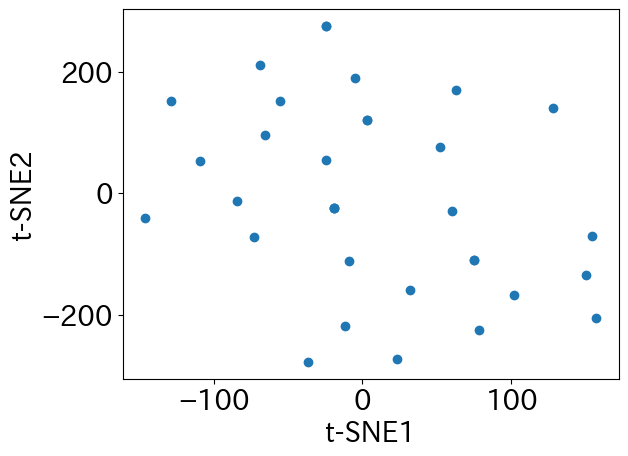

In [30]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=20
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

## t-SNEで説明変数を2次元に圧縮し可視化（perplexity=20）&各水準のIDを表示

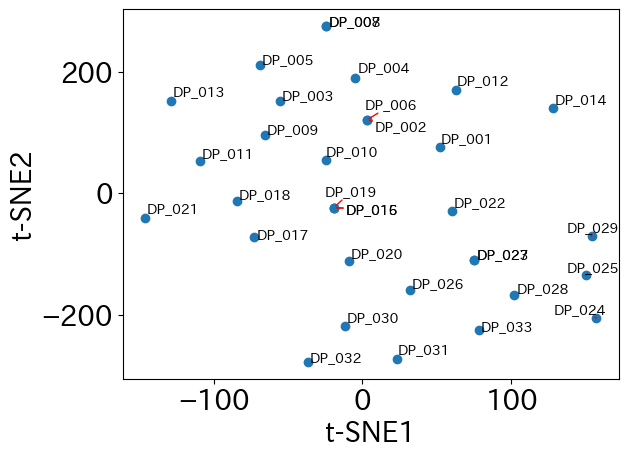

In [31]:
# tsneを実行、n_components=2、random_state=CFG.random_seed
tsne = TSNE(
    n_components=2, random_state=CFG.random_seed, perplexity=20
)  # perplexity must be less than n_samples、デフォルト値は30
X_train_tsne = tsne.fit_transform(X_train)
X_train_tsne

# X_train_tsneをDataFrameに変換
train_tsne_df = pd.DataFrame(X_train_tsne, columns=["t-SNE1", "t-SNE2"])

# train_tsne_dfの散布図を描画
plt.scatter(train_tsne_df["t-SNE1"], train_tsne_df["t-SNE2"])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_tsne_df["t-SNE1"][i],
        train_tsne_df["t-SNE2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_tsne_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=15）

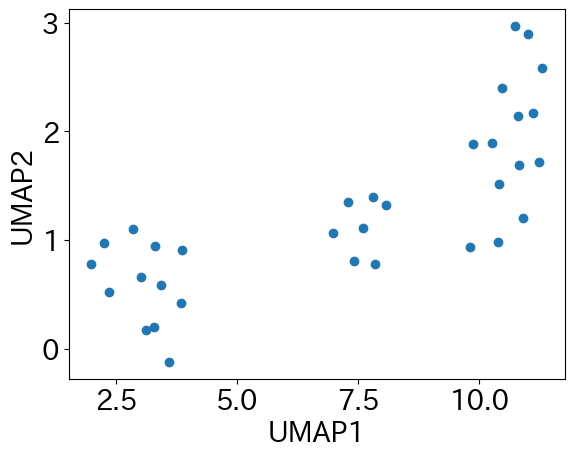

In [32]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=15）&各水準のIDを表示

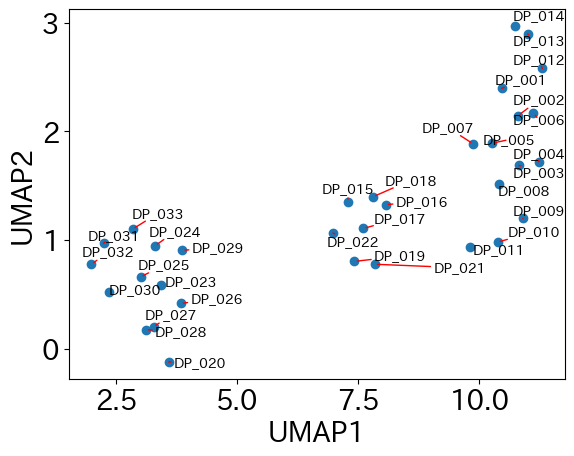

In [33]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=5）

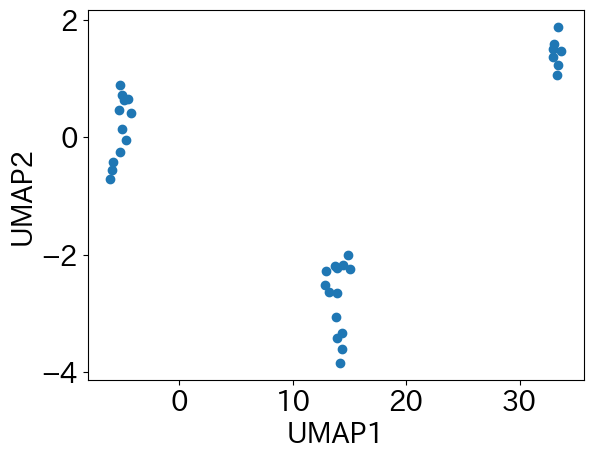

In [34]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=5）&各水準のIDを表示

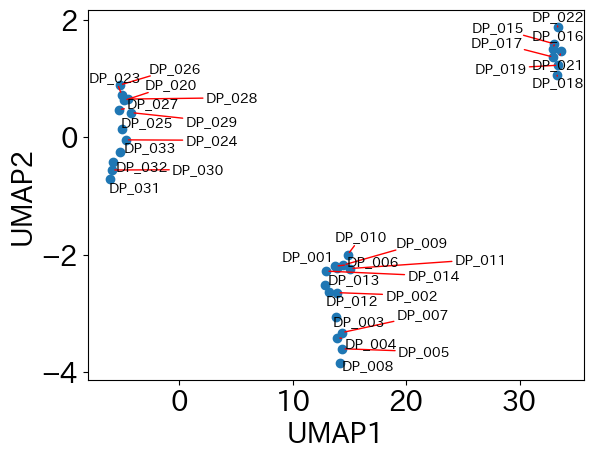

In [35]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=30）

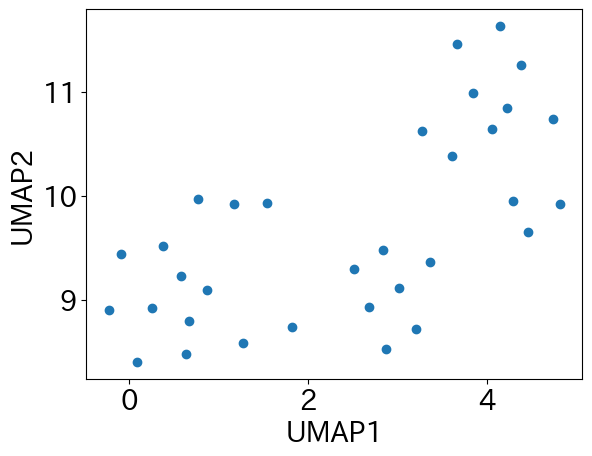

In [36]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=30
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.show()

## UMAPで説明変数を2次元に圧縮し可視化（n_neighbors=30）&各水準のIDを表示

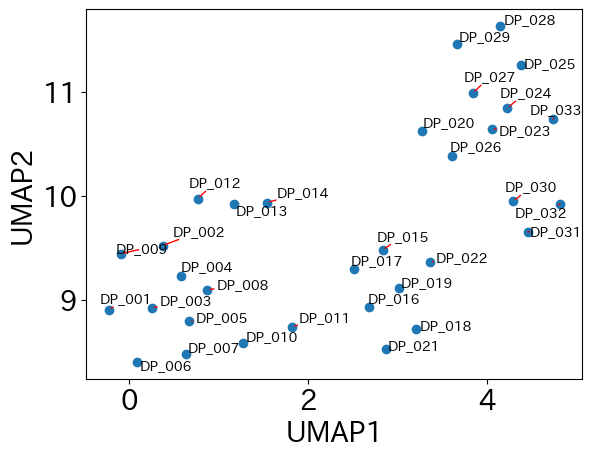

In [37]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=30
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

# train_umap_dfの散布図を描画
plt.scatter(train_umap_df["UMAP1"], train_umap_df["UMAP2"])
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
# plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
texts = [
    plt.text(
        train_umap_df["UMAP1"][i],
        train_umap_df["UMAP2"][i],
        train_df["サンプルID"][i],
        fontsize=10,
    )
    for i in range(len(train_umap_df))
]
adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
plt.show()

## UMAPを用いた目的変数のカラープロット

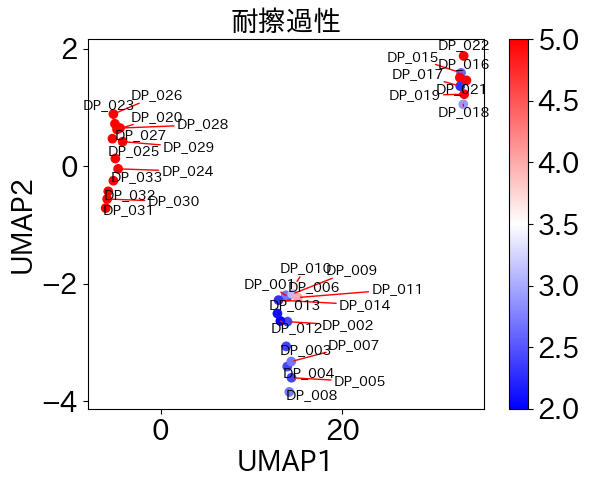

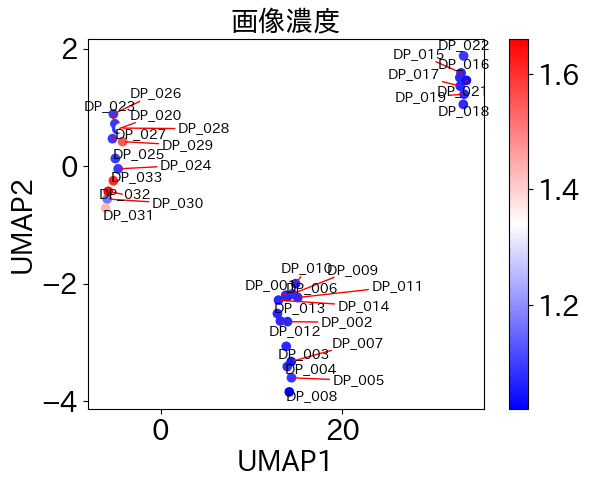

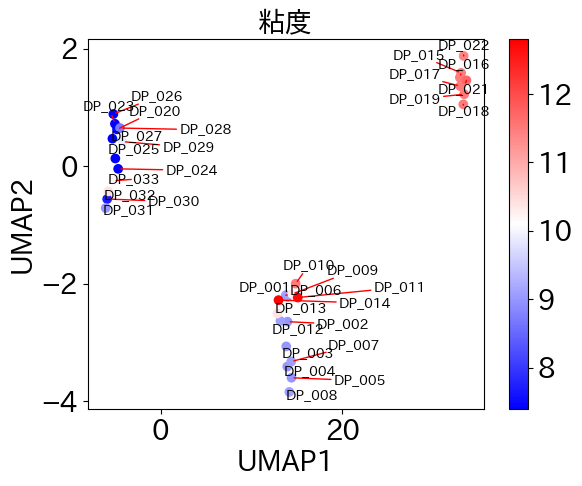

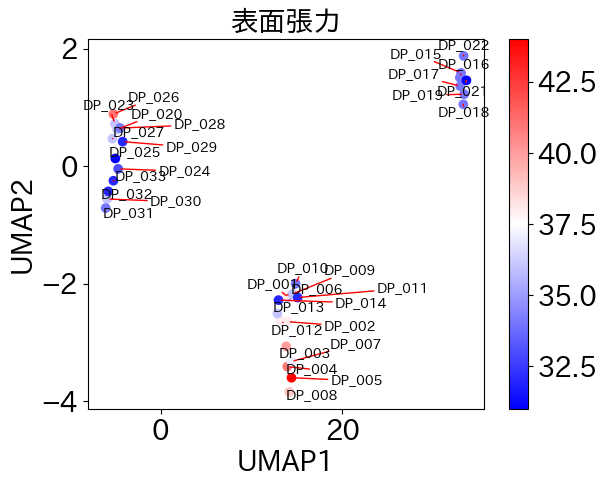

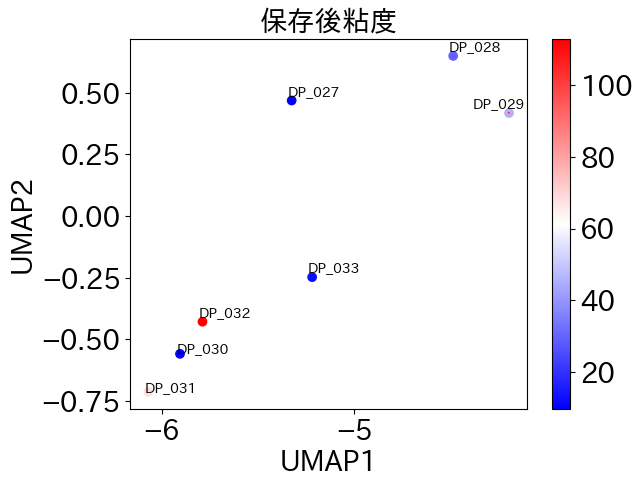

In [38]:
# UMAPを実行、n_components=2、random_state=CFG.random_seed
umap_ = umap.UMAP(
    n_components=2, random_state=CFG.random_seed, n_neighbors=5
)  # n_neighborsのデフォルト値は15
X_train_umap = umap_.fit_transform(X_train)
X_train_umap

# X_train_umapをDataFrameに変換
train_umap_df = pd.DataFrame(X_train_umap, columns=["UMAP1", "UMAP2"])

plot_df = pd.concat([train_umap_df, train_df], axis=1)

for col in objective_cols:
    # train_umap_dfの散布図を描画
    plot_df_dropna = plot_df.dropna(subset=col).reset_index(drop=True)

    plt.scatter(
        plot_df_dropna["UMAP1"],
        plot_df_dropna["UMAP2"],
        c=plot_df_dropna[col],
        cmap=plt.colormaps["bwr"],
    )
    plt.xlabel("UMAP1")
    plt.ylabel("UMAP2")
    # plt.txtで対応するサンプルIDを表示、adjustTextモジュールを使用して、重なりがないように表示
    texts = [
        plt.text(
            plot_df_dropna["UMAP1"][i],
            plot_df_dropna["UMAP2"][i],
            plot_df_dropna["サンプルID"][i],
            fontsize=10,
        )
        for i in range(len(plot_df_dropna))
    ]
    adjust_text(texts, arrowprops=dict(arrowstyle="-", color="red"))
    plt.colorbar()
    plt.title(col)
    plt.show()